# **Project Name**    -  **Retail Sales Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

This dataset is a live dataset of Rossmann Stores. On analsysing this problem we observe that Rossmann problem is a regression problem and our primarily goal is to predict the sales figures of Rossman stores. In this Notebook we work on following topics :


*   Analysing the Dataset by using Exploratory Data Analysis.
*    Using Exponential Moving Averages analyse Trends and Seasonality in Rossmann dataset.
*   Analyse Regression analysis using following prediction analysis
     1.   Linear Regression Analysis.
     2.     Lasso and Ridge Regression.
     3.   Decision Tree Regression.
     4.   Random Forest Regression.
     5.   Isolation Forest for Outlier Detection.









# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
Here we have historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict,cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
import math
from scipy import stats


### Dataset Loading

In [3]:
# Load Dataset
store_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML_Capstone_Regression/store.csv")
rossman_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML_Capstone_Regression/Rossmann Stores Data.csv")

<ipython-input-3-893e1b71b24e>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossman_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML_Capstone_Regression/Rossmann Stores Data.csv")


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [4]:
# Dataset First Look
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print("Store Dataset shape :" ,store_df.shape)

Store Dataset shape : (1115, 10)


In [7]:
print("Rossman Dataset shape :" ,rossman_df.shape)

Rossman Dataset shape : (1017209, 9)


### Dataset Information

In [8]:
# Dataset Info
store_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Store,1115.0,NaN,NaN,NaN,558.0,322.01708,1.0,279.5,558.0,836.5,1115.0
StoreType,1115,4,a,602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assortment,1115,3,a,593,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CompetitionDistance,1112.0,NaN,NaN,NaN,5404.901079,7663.17472,20.0,717.5,2325.0,6882.5,75860.0
CompetitionOpenSinceMonth,761.0,NaN,NaN,NaN,7.224704,3.212348,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,761.0,NaN,NaN,NaN,2008.668857,6.195983,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,1115.0,NaN,NaN,NaN,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,571.0,NaN,NaN,NaN,23.595447,14.141984,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,571.0,NaN,NaN,NaN,2011.763573,1.674935,2009.0,2011.0,2012.0,2013.0,2015.0
PromoInterval,571,3,"Jan,Apr,Jul,Oct",335,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
rossman_df.describe(include = 'all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
store_df.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [11]:
rossman_df.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

### What did you know about your dataset?

* Rossmann Stores Data.csv - historical data including Sales
* store.csv - supplemental information about the stores

## ***2. Understanding Your Variables***

### Variables Description

* Id - an Id that represents a (Store, Date) duple within the test set
* Store - a unique Id for each store
* Sales - the turnover for any given day (this is what you are predicting)
* Customers - the number of customers on a given day
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* StoreType - differentiates between 4 different store models: a, b, c, d
* Assortment - describes an assortment level: a = basic, b = extra, c = extended
* CompetitionDistance - distance in meters to the nearest competitor store
* CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* Promo - indicates whether a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
store_fields = list(store_df.columns)
store_fields

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [14]:
store_fields.remove('Store')
store_fields.remove('CompetitionDistance')

In [15]:
for i in store_fields:
  print("Unique values for ",i, ":" ,store_df[i].unique())

Unique values for  StoreType : ['c' 'a' 'd' 'b']
Unique values for  Assortment : ['a' 'c' 'b']
Unique values for  CompetitionOpenSinceMonth : [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
Unique values for  CompetitionOpenSinceYear : [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for  Promo2 : [0 1]
Unique values for  Promo2SinceWeek : [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for  Promo2SinceYear : [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for  PromoInterval : [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [16]:
rossman_fields = list(rossman_df.columns)
rossman_fields

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

In [17]:
rossman_fields.remove('Store')
rossman_fields.remove('Date')

In [18]:
for i in rossman_fields:
  print("Unique values for ",i, ":" ,rossman_df[i].unique())

Unique values for  DayOfWeek : [5 4 3 2 1 7 6]
Unique values for  Sales : [ 5263  6064  8314 ...   660 17815 23303]
Unique values for  Customers : [ 555  625  821 ... 3900   36 4065]
Unique values for  Open : [1 0]
Unique values for  Promo : [1 0]
Unique values for  StateHoliday : ['0' 'a' 'b' 'c' 0]
Unique values for  SchoolHoliday : [1 0]


## 3. ***Data Wrangling***

### Data Wrangling Code

In [19]:
# Write your code to make your dataset analysis ready.
# Handling missing values

store_new = store_df.copy()

store_new['CompetitionDistance'] = store_new['CompetitionDistance'].fillna(0)

competition_month_mode = store_new['CompetitionOpenSinceMonth'].mode().iloc[0]
store_new['CompetitionOpenSinceMonth'] = store_new['CompetitionOpenSinceMonth'].fillna(competition_month_mode)
competition_year_mode = store_new['CompetitionOpenSinceYear'].mode().iloc[0]
store_new['CompetitionOpenSinceYear'] = store_new['CompetitionOpenSinceYear'].fillna(competition_year_mode)

store_new['Promo2SinceWeek'] = store_new['Promo2SinceWeek'].fillna(0)
promo2year_mode = store_new['Promo2SinceYear'].mode().iloc[0]
store_new['Promo2SinceYear'] = store_new['Promo2SinceYear'].fillna(promo2year_mode)
promo_interval_mode = store_new['PromoInterval'].mode().iloc[0]
store_new['PromoInterval'] = store_new['PromoInterval'].fillna(promo_interval_mode)

store_new.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [20]:
store_new.StoreType.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [21]:
store_new.Assortment.unique()

array(['a', 'c', 'b'], dtype=object)

In [22]:
store_new.Promo2.unique()

array([0, 1])

In [23]:
store_new.PromoInterval.unique()

array(['Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [24]:
#Mapping the unique values of above columns to numerical values
store_new['StoreType']    = store_new['StoreType'].map({'a':1,'b':2,'c':3,'d':4})
store_new['Assortment']   = store_new['Assortment'].map({'a':0, 'c':1,'b':2})
store_new['PromoInterval']= store_new['PromoInterval'].map({'Jan,Apr,Jul,Oct':0, 'Feb,May,Aug,Nov':1,'Mar,Jun,Sept,Dec' :2})

In [25]:
store_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   int64  
 2   Assortment                 1115 non-null   int64  
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 87.2 KB


In [26]:
store_new.sample(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
892,893,1,0,130.0,9.0,2013.0,1,1.0,2013.0,0
20,21,3,1,550.0,10.0,1999.0,1,45.0,2009.0,0
298,299,4,1,38630.0,9.0,2012.0,0,0.0,2011.0,0
500,501,1,1,1620.0,9.0,2006.0,0,0.0,2011.0,0
167,168,1,0,12540.0,9.0,2013.0,0,0.0,2011.0,0
1089,1090,1,0,330.0,9.0,2013.0,1,14.0,2011.0,0
1108,1109,3,0,3490.0,4.0,2011.0,1,22.0,2012.0,0
798,799,1,1,2700.0,9.0,2013.0,0,0.0,2011.0,0
116,117,1,0,3450.0,9.0,2011.0,0,0.0,2011.0,0
721,722,1,0,50.0,9.0,2013.0,0,0.0,2011.0,0


In [27]:
rossman_new = pd.merge(left = rossman_df, right = store_new, how = 'inner', on = ['Store'])

In [28]:
rossman_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,3,0,1270.0,9.0,2008.0,0,0.0,2011.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,3,0,1270.0,9.0,2008.0,0,0.0,2011.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,3,0,1270.0,9.0,2008.0,0,0.0,2011.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,3,0,1270.0,9.0,2008.0,0,0.0,2011.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,3,0,1270.0,9.0,2008.0,0,0.0,2011.0,0


In [29]:
rossman_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int64  
 10  Assortment                 1017209 non-null  int64  
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [30]:
rossman_df['Date'] = pd.to_datetime(rossman_df['Date'])
rossman_new['StateHoliday'] = rossman_new['StateHoliday'].replace({0: '0'})
rossman_new['Month'] = rossman_df['Date'].dt.month

In [31]:
rossman_new.drop(['Date', 'Customers', 'Store'], axis = 1, inplace = True)

In [32]:
rossman_new.nunique()

DayOfWeek                        7
Sales                        21734
Open                             2
Promo                            2
StateHoliday                     4
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            655
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 25
Promo2SinceYear                  7
PromoInterval                    3
Month                           12
dtype: int64

### What all manipulations have you done and insights you found?

1. Identified the unique values for each dataset.
2. Handled the missing values :
   * Competition Distance had only 3 missing values so imputed 0.
   * Imputed mode values for categorical variables - CompetitionOpenSinceMonth,CompetitionOpenSinceYear, Promo2SinceYear,PromoInterval.
3. Mapped str values for columns StoreType, Assortment, PromoInterval to numerical values.
4. Created a new column 'Month' from 'date' column.
5. Dropped columns 'Date', 'Store', 'Customer' as they had all unique values, not important for our analysis.
6. Merged Rossmann.csv and Stores.csv after cleaning each on 'Stores' column to derive the final dataset rossman_new.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 **Sales per Month**

In [33]:
# Chart - 1 visualization code
# Sales vs Month
def convert_to_month(n):
  dic = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
  return dic[n]


In [34]:
rossman_new['Month'] = rossman_new['Month'].map(convert_to_month)

<Axes: xlabel='Month', ylabel='Sales'>

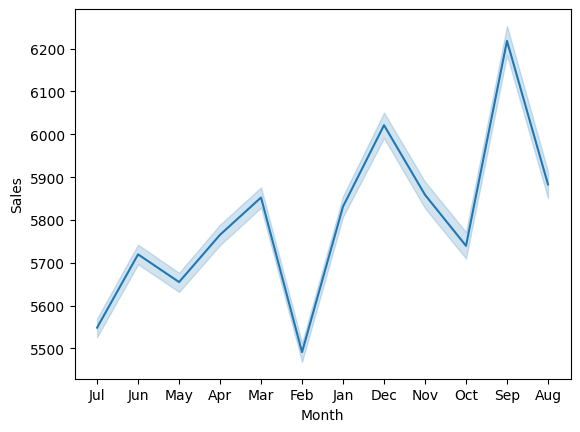

In [35]:
sns.lineplot(data= rossman_new, x = 'Month', y = 'Sales',markers = True, dashes = True,sort = True)

**From the above chart,we can derive that maximum sales are made in months- September,December,March which infers that sales peak during festival seasons.**

#### Chart - 2 **DayOfWeek v/s Sales**

In [36]:
# Chart - 2 visualization code
def convert_to_day(n):
  day ={1:'Mon',2:'Tues',3:'Wed',4:'Thurs',5:'Fri',6:'Sat',7:'Sun'}
  return day[n]

In [37]:
rossman_new['DayOfWeek'] = rossman_new['DayOfWeek'].map(convert_to_day)

Text(0, 0.5, 'Sales')

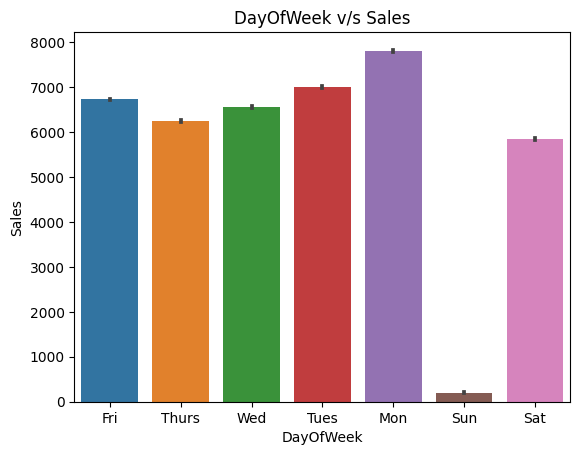

In [38]:
sns.barplot(data = rossman_new, x ='DayOfWeek', y = 'Sales')
plt.title('DayOfWeek v/s Sales')
plt.xlabel('DayOfWeek')
plt.ylabel('Sales')

**From the above chart, we can see that maximum sales are being generated on weekdays with maximum on Mondays and contrary to the expected hypothesis, sales values are depreciating during weekend.This is also an indicative of the fact that stores are closed on Sundays.**

<ipython-input-39-cba7c5489351>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = rossman_df["Sales"])


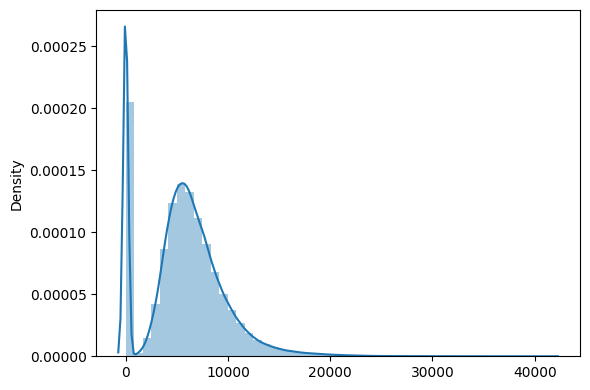

In [39]:
plt.figure(figsize=(6,4))
sns.distplot(x = rossman_df["Sales"])
plt.tight_layout()

<ipython-input-40-029a75512180>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = rossman_df["Customers"])


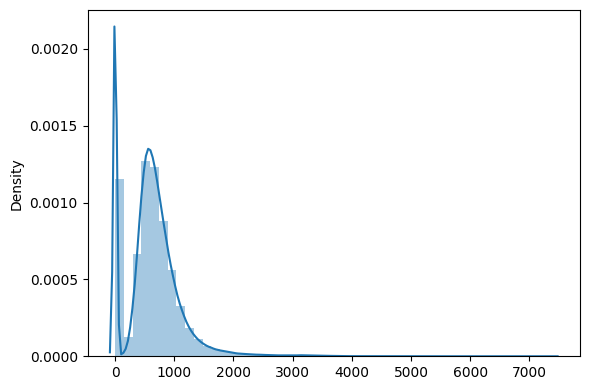

In [40]:
plt.figure(figsize=(6,4))
sns.distplot(x = rossman_df["Customers"])
plt.tight_layout()

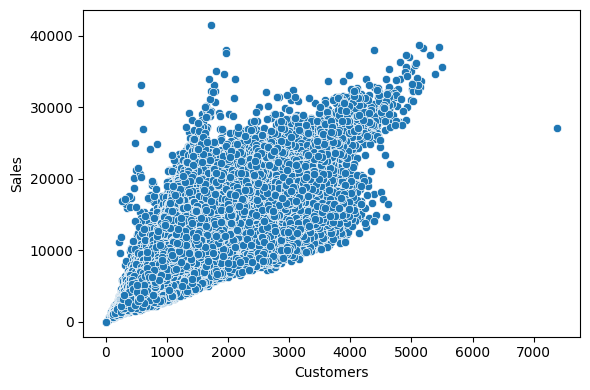

In [41]:
plt.figure(figsize=(6,4))
sns.scatterplot(x = rossman_df["Customers"],y= rossman_df["Sales"])
plt.tight_layout()

**The above chart shows a linear relationship betwen number of Customers and Sales which makes sense because as the customers will increase,sales generated will also increase.**

#### Chart - 3  **StoreType v/s Sales**

Text(0, 0.5, 'Sales')

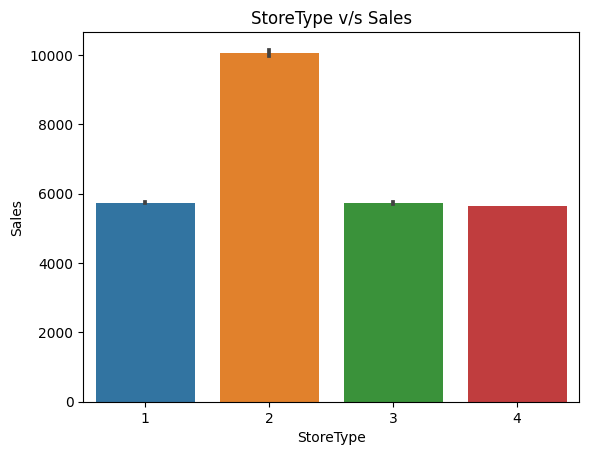

In [42]:
# Chart - 3 visualization code
sns.barplot(data = rossman_new, x ='StoreType', y = 'Sales')
plt.title('StoreType v/s Sales')
plt.xlabel('StoreType')
plt.ylabel('Sales')

**From the above chart, we can infer that Store B has largest sale. The other three stores,A,C,D have almost same amount of Sales generating on a daily basis.**

In [43]:
rossman_new["StoreType"].value_counts()

1    551627
4    312912
3    136840
2     15830
Name: StoreType, dtype: int64

#### Chart - 4  **Assortment v/s Sales**

<Axes: xlabel='Assortment', ylabel='Sales'>

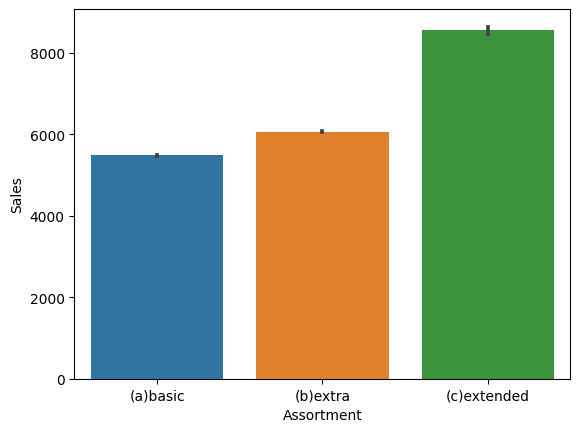

In [44]:
# Chart - 4 visualization code
def convert_assortments(n):
  assort = {0:'(a)basic', 1:'(b)extra', 2:'(c)extended'}
  return assort[n]

rossman_new['Assortment'] = rossman_new['Assortment'].map(convert_assortments)
sns.barplot(data= rossman_new, x = 'Assortment', y= 'Sales')

**From the above chart, we can infer that maximum ales are getting generated for Basic Assortment, followed by Extra. Extended assortments have minimum Sales value.**

In [45]:
rossman_new["Assortment"].value_counts()

(a)basic       537445
(b)extra       471470
(c)extended      8294
Name: Assortment, dtype: int64

#### Chart - 5 **Average distance from Competition Stores per StoreType**

In [46]:
# Chart - 5 visualization code
comp_dist = pd.DataFrame(rossman_new.groupby(['StoreType'])['CompetitionDistance'].mean())
comp_dist

,CompetitionDistance
StoreType,
1,5157.630591
2,1066.058117
3,3516.699503
4,6922.062944


<ipython-input-47-b59ecf60590b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = rossman_new["CompetitionDistance"])


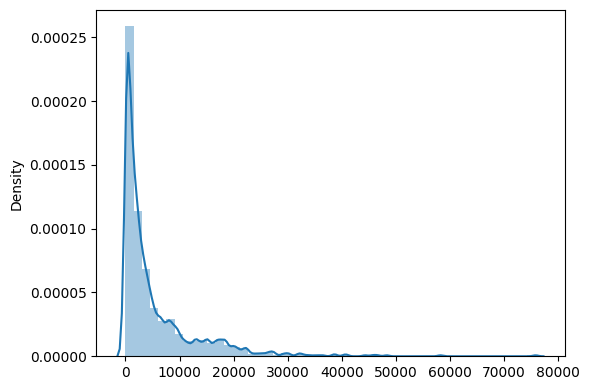

In [47]:
plt.figure(figsize=(6,4))
sns.distplot(x = rossman_new["CompetitionDistance"])
plt.tight_layout()

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

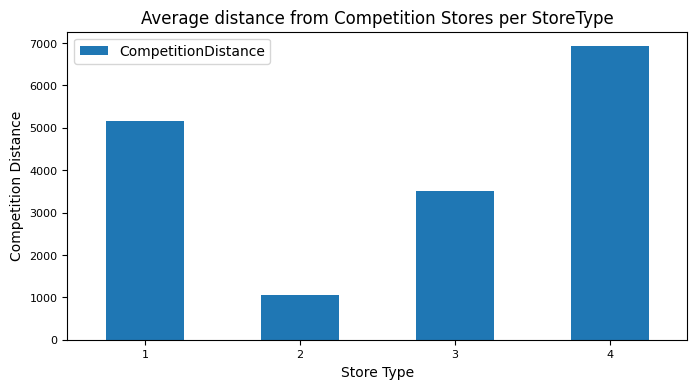

In [48]:
# Creating the figure object
ax = comp_dist.plot.bar(figsize = (8,4),fontsize = 8)

# Set the title
ax.set_title("Average distance from Competition Stores per StoreType", fontsize = 12)

# Set x and y-labels
ax.set_xlabel("Store Type", fontsize = 10)
ax.set_ylabel("Competition Distance", fontsize = 10)
plt.xticks(rotation = 0)

**StoreType B has many competition stores nearby which may or maynot have any impact on its sales. StoreType D is at maximum distance from competition stores which implies that its Sales should be proliferating.**

#### Chart - 6 **Affect of Promo on Sales**

In [49]:
rossman_new['Promo'].value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

Promo Applied : 1
Promo Not Applied : 0


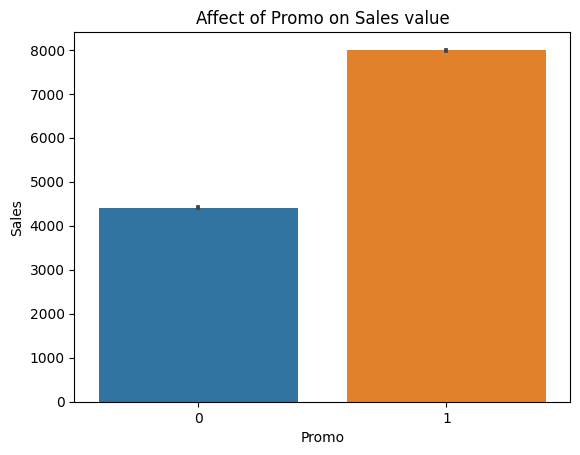

In [50]:
# Chart - 6 visualization code

sns.barplot(data = rossman_new, x = 'Promo', y = 'Sales')
plt.title("Affect of Promo on Sales value")

print("Promo Applied : 1")
print("Promo Not Applied : 0")

Promo2 Applied : 1
Promo2 Not Applied : 0


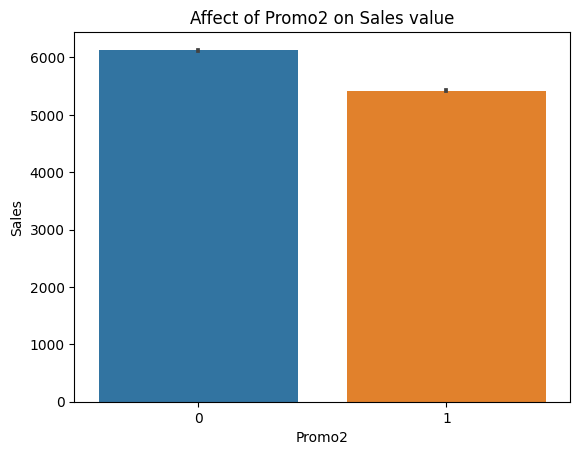

In [51]:

sns.barplot(data = rossman_new, x = 'Promo2', y = 'Sales')
plt.title("Affect of Promo2 on Sales value")

print("Promo2 Applied : 1")
print("Promo2 Not Applied : 0")

In [52]:
rossman_new['Promo2'].value_counts()

1    509178
0    508031
Name: Promo2, dtype: int64

Promo Applied : 1
Promo Not Applied : 0


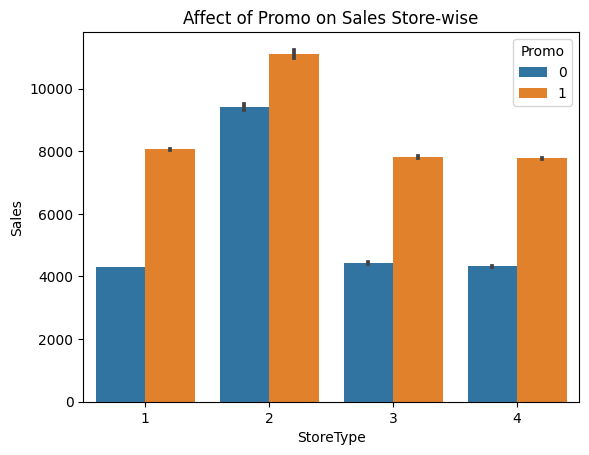

In [53]:
sns.barplot(data = rossman_new, x = 'StoreType', y = 'Sales', hue='Promo')
plt.title("Affect of Promo on Sales Store-wise")

print("Promo Applied : 1")
print("Promo Not Applied : 0")

**Promo Analysis**

* It is observed that sales values increase when any kind of promotion/discount is offered.
* The affect of consecutive promotions i.e. Promo2 however doesn't show any considerable affects on sales.
* The affect of Promo is most benefitting for Store Type B. However in every other Store Type, sales value increases due to Promo.

#### Chart - 7 **PromoInterval v/s Sales**

(array([0, 1, 2]),
 [Text(0, 0, 'Jan,Apr,Jul,Oct'),
  Text(1, 0, 'Feb,May,Aug,Nov'),
  Text(2, 0, 'Mar,Jun,Sept,Dec')])

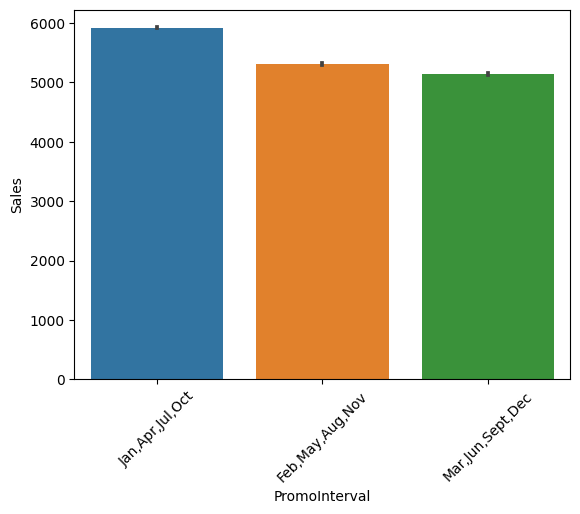

In [54]:
# Chart - 7 visualization code

def convert_promoInterval(n):
  pt = {0:'Jan,Apr,Jul,Oct', 1:'Feb,May,Aug,Nov', 2:'Mar,Jun,Sept,Dec'}
  return pt[n]

rossman_new['PromoInterval'] = rossman_new['PromoInterval'].map(convert_promoInterval)
sns.barplot(data = rossman_new, x = 'PromoInterval', y ='Sales')
plt.xticks(rotation = 45)

In [55]:
rossman_new["PromoInterval"].value_counts()

Jan,Apr,Jul,Oct     801153
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64

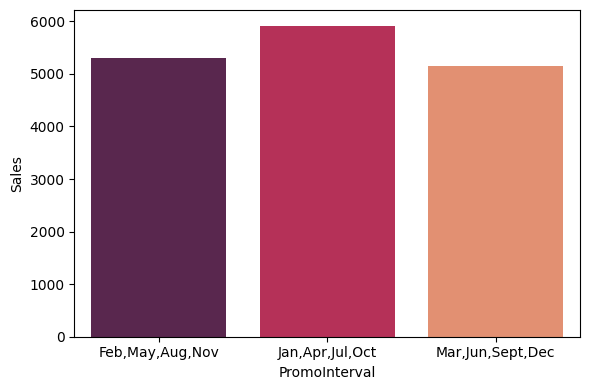

In [56]:
plt.figure(figsize=(6,4))
PromoInterval_df = rossman_new.groupby("PromoInterval")["Sales"].mean().to_frame().reset_index()
sns.barplot(x=PromoInterval_df["PromoInterval"],y=PromoInterval_df["Sales"],palette="rocket")
plt.tight_layout()

**Sales are maximum for PromoInterval Jan,Apr,Jul,Oct**

#### Chart - 8 **StateHoliday v/s Sales**

<Axes: xlabel='StateHoliday', ylabel='Sales'>

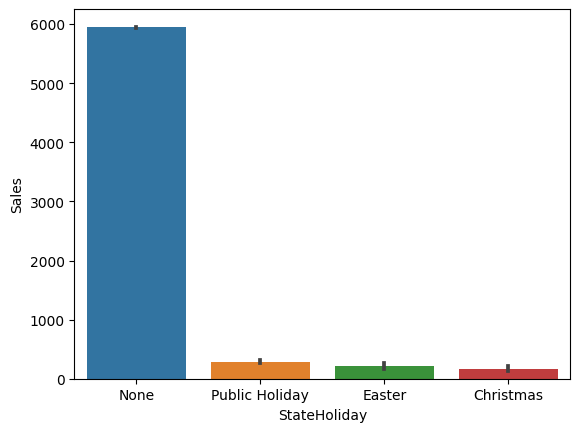

In [57]:
# Chart - 8 visualization code
def convert_stateHoliday(n):
  sh = {'0':'None', 'a':'Public Holiday', 'b':'Easter', 'c':'Christmas'}
  return sh[n]

rossman_new['StateHoliday'] = rossman_new['StateHoliday'].map(convert_stateHoliday)
sns.barplot(data = rossman_new, x = 'StateHoliday', y = 'Sales')

In [58]:
rossman_new['StateHoliday'].value_counts()

None              986159
Public Holiday     20260
Easter              6690
Christmas           4100
Name: StateHoliday, dtype: int64

#### Chart - 9 **SchoolHoliday v/s Sales**

Not a School Holiday : 0
School Holiday : 1


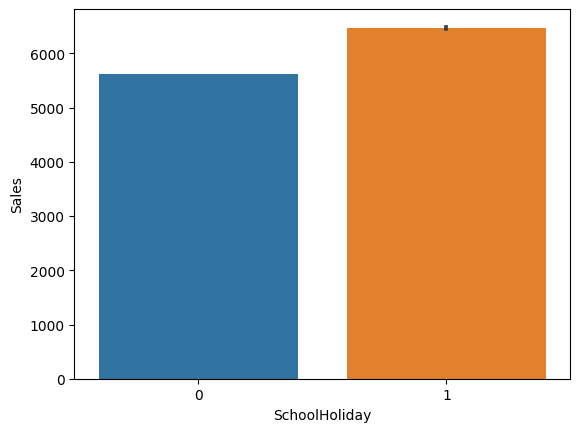

In [59]:
# Chart - 9 visualization code

sns.barplot(data = rossman_new, x = 'SchoolHoliday', y = 'Sales')

print("Not a School Holiday : 0")
print("School Holiday : 1")

#### Chart - 10  **Correlation Heatmap**

In [60]:
# Chart - 10 visualization code

correl = rossman_new.corr()
correl

<ipython-input-60-b3c872bb986d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl = rossman_new.corr()


,Sales,Open,Promo,SchoolHoliday,StoreType,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Sales,1.000000,0.678472,0.452345,0.085124,-0.013057,-0.018609,-0.023226,0.008740,-0.091040,-0.044143,-0.040708
Open,0.678472,1.000000,0.295042,0.086171,-0.003325,0.007989,0.001436,0.002557,-0.008309,-0.007436,-0.001421
Promo,0.452345,0.295042,1.000000,0.067483,-0.000299,0.000141,-0.000008,0.000130,-0.000983,-0.001210,-0.000490
SchoolHoliday,0.085124,0.086171,0.067483,1.000000,0.000032,-0.003651,0.000124,0.001841,-0.006909,-0.006679,-0.004572
StoreType,-0.013057,-0.003325,-0.000299,0.000032,1.000000,0.077056,0.040474,0.043591,0.088922,0.059704,-0.019031
CompetitionDistance,-0.018609,0.007989,0.000141,-0.003651,0.077056,1.000000,-0.049262,0.019869,-0.138832,-0.122348,-0.094262
CompetitionOpenSinceMonth,-0.023226,0.001436,-0.000008,0.000124,0.040474,-0.049262,1.000000,0.058298,0.021534,0.019623,0.014728
CompetitionOpenSinceYear,0.008740,0.002557,0.000130,0.001841,0.043591,0.019869,0.058298,1.000000,-0.022581,-0.027371,-0.023456
Promo2,-0.091040,-0.008309,-0.000983,-0.006909,0.088922,-0.138832,0.021534,-0.022581,1.000000,0.759240,0.304710
Promo2SinceWeek,-0.044143,-0.007436,-0.001210,-0.006679,0.059704,-0.122348,0.019623,-0.027371,0.759240,1.000000,0.080006


<Axes: >

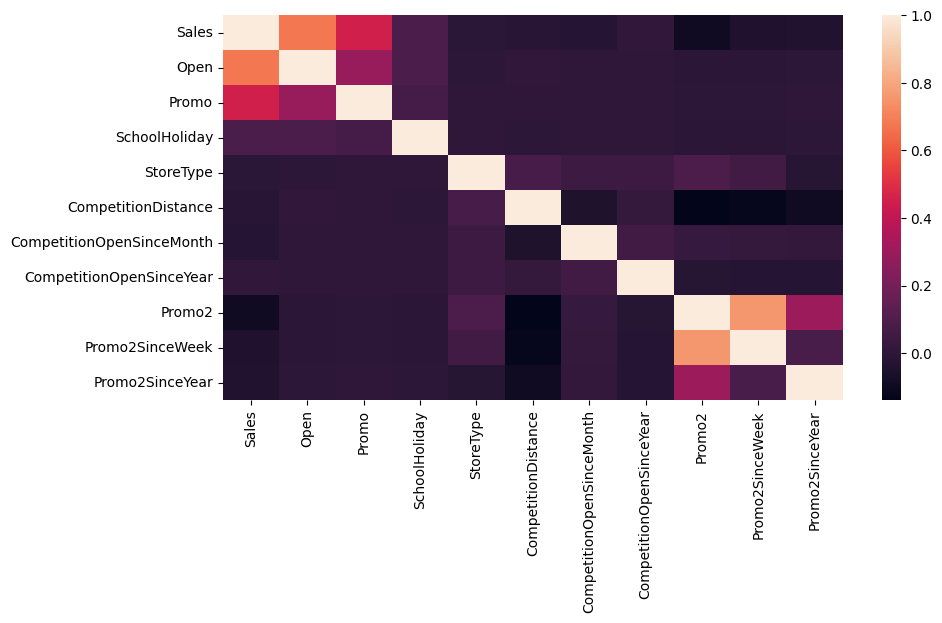

In [61]:
plt.figure(figsize=(10,5))
sns.heatmap(correl)

In [62]:
rossman_new.corr()['Sales']

<ipython-input-62-0829c6c9bc46>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rossman_new.corr()['Sales']


Sales                        1.000000
Open                         0.678472
Promo                        0.452345
SchoolHoliday                0.085124
StoreType                   -0.013057
CompetitionDistance         -0.018609
CompetitionOpenSinceMonth   -0.023226
CompetitionOpenSinceYear     0.008740
Promo2                      -0.091040
Promo2SinceWeek             -0.044143
Promo2SinceYear             -0.040708
Name: Sales, dtype: float64

#### Chart - 11 **Pair Plot**

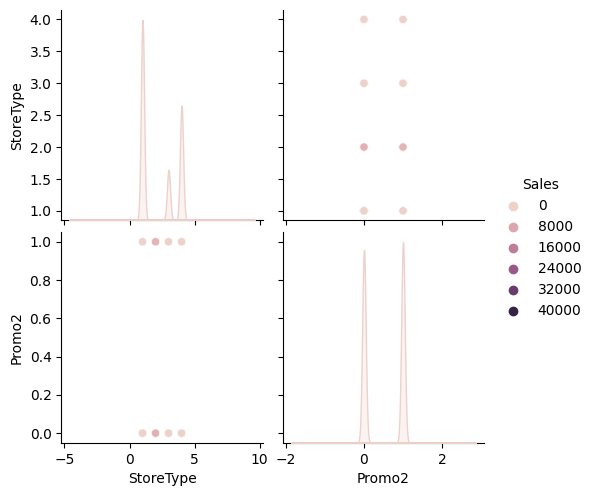

In [63]:
# Chart - 11 visualization code
pp_df = rossman_new[['StoreType','Promo2','PromoInterval','Month','Sales']]
sns.pairplot(data = pp_df, hue = 'Sales')

## **EDA Findings**

**1. Sales Trends and Patterns:**

* Overall, there is a clear upward trend in sales over the analyzed time period, indicating the business's growth.
* Seasonality is evident in the data, with higher sales during certain months or seasons (e.g., holiday seasons) and lower sales during others.Largest sales have been recorded for the months of September and December.

**2. Impact of Promo2:**

* Promotions or any kind of discount/ promo offered, has a significant positive impact on sales volume.
* Maximum Promotions have been used in Store D however Maximum Sales have been recorded at Store B which shows offering Promo2 isn't a driving factor for Sales.
* Extended promotion periods tend to drive more sustained increases in sales.

**3. Store Analysis:**

* Different store types and assortments exhibit varying sales patterns and customer behaviors.
* Store size and location influence sales performance, with larger stores or those in high-traffic areas generally performing better.

**4. Day of the Week and Holidays:**

* Weekends experience relatively steady sales, while weekdays (especially Mondays) have higher sales, possibly due to increased foot traffic on working days.
* It is observed that majority of the stores remain closed during State and School Holidays. Sales recorded during State Holidays like Easter and Christmas were least; however stores which were open during School Holidays recorded more sales which is an indicative that potential customers are not school going children.

**5. Customer Behavior:**

* The number of customers correlates strongly with sales, indicating that foot traffic is a key driver of sales.
* Customer count and sales both drop during holidays, possibly due to store closures or reduced operating hours.

**6. Assortment and Product Categories:**

* Certain assortments or product categories contribute more to overall sales, suggesting that focusing on high-performing categories could lead to increased revenue.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### **Store Type A has a higher average sales amount than Store Type B.**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null Hypothesis (H0)**: The average sales of Store Type A is equal to the average sales of Store Type B.
* **Alternative Hypothesis (H1)**: The average sales of Store Type A is higher than the average sales of Store Type B.

#### 2. Perform an appropriate statistical test.

In [64]:
# Perform Statistical Test to obtain P-Value

# Subset the data for Store Type A and Store Type B
store_a_sales = rossman_new[rossman_new['StoreType'] == 1]['Sales']
store_b_sales = rossman_new[rossman_new['StoreType'] == 2]['Sales']

# Calculate the means and standard deviations
mean_store_a = np.mean(store_a_sales)
mean_store_b = np.mean(store_b_sales)
std_store_a = np.std(store_a_sales)
std_store_b = np.std(store_b_sales)
n_store_a = len(store_a_sales)
n_store_b = len(store_b_sales)

# Perform Z-test for comparing means
z_score = (mean_store_a - mean_store_b) / np.sqrt((std_store_a**2 / n_store_a) + (std_store_b**2 / n_store_b))
p_value = 1 - stats.norm.cdf(z_score)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    result = "Reject the null hypothesis"
else:
    result = "Fail to reject the null hypothesis"

# Print results
print("Hypothesis 1: Store Type A vs Store Type B")
print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")
print(result)


Hypothesis 1: Store Type A vs Store Type B
Z-score: -102.12760161476437
P-value: 1.0
Fail to reject the null hypothesis


### Hypothetical Statement - 2

#### **There is a significant difference in sales between months with and without promotions.**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null Hypothesis (H0)**: There is no significant difference in sales between months with and without promotions.
* **Alternative Hypothesis (H1)**: There is a significant difference in sales between months with and without promotions.

#### 2. Perform an appropriate statistical test.

In [65]:
# Perform Statistical Test to obtain P-Value

# Subset the data for months with and without promotions
promo_sales = rossman_new[rossman_new['Promo'] == 1]['Sales']
non_promo_sales = rossman_new[rossman_new['Promo'] == 0]['Sales']

# Calculate the means and standard deviations
mean_promo = np.mean(promo_sales)
mean_non_promo = np.mean(non_promo_sales)
std_promo = np.std(promo_sales)
std_non_promo = np.std(non_promo_sales)
n_promo = len(promo_sales)
n_non_promo = len(non_promo_sales)

# Perform Z-test for comparing means
z_score = (mean_promo - mean_non_promo) / np.sqrt((std_promo**2 / n_promo) + (std_non_promo**2 / n_non_promo))
p_value = 1 - stats.norm.cdf(z_score)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    result = "Reject the null hypothesis"
else:
    result = "Fail to reject the null hypothesis"

# Print results
print("Hypothesis 2: Sales in Months with Promotions vs Months without Promotions")
print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")
print(result)


Hypothesis 2: Sales in Months with Promotions vs Months without Promotions
Z-score: 512.3760945228883
P-value: 0.0
Reject the null hypothesis


### Hypothetical Statement - 3

#### **The average sales on weekends are different from the average sales on weekdays.**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null Hypothesis (H0)**: The average sales on weekends are equal to the average sales on weekdays.
* **Alternative Hypothesis (H1)**: The average sales on weekends are different from the average sales on weekdays.

#### 2. Perform an appropriate statistical test.

In [66]:
# Perform Statistical Test to obtain P-Value

# Subset the data for weekends (Saturday and Sunday) and weekdays
weekend_sales = rossman_new[rossman_new['DayOfWeek'].isin(['Sun', 'Sat'])]['Sales']
weekday_sales = rossman_new[rossman_new['DayOfWeek'].isin(['Fri', 'Thurs', 'Wed', 'Tues', 'Mon'])]['Sales']

# Calculate the means and standard deviations
mean_weekend = np.mean(weekend_sales)
mean_weekday = np.mean(weekday_sales)
std_weekend = np.std(weekend_sales)
std_weekday = np.std(weekday_sales)
n_weekend = len(weekend_sales)
n_weekday = len(weekday_sales)

# Perform Z-test for comparing means
z_score = (mean_weekend - mean_weekday) / np.sqrt((std_weekend**2 / n_weekend) + (std_weekday**2 / n_weekday))
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_score)))  # Two-tailed test

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    result = "Reject the null hypothesis"
else:
    result = "Fail to reject the null hypothesis"

# Print results
print("Hypothesis 3: Weekend Sales vs Weekday Sales")
print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")
print(result)


Hypothesis 3: Weekend Sales vs Weekday Sales
Z-score: -489.188562414098
P-value: 0.0
Reject the null hypothesis


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [67]:
# Handling Missing Values & Missing Value Imputation
rossman_new.isna().sum()

DayOfWeek                    0
Sales                        0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Month                        0
dtype: int64

### 2. Handling Outliers

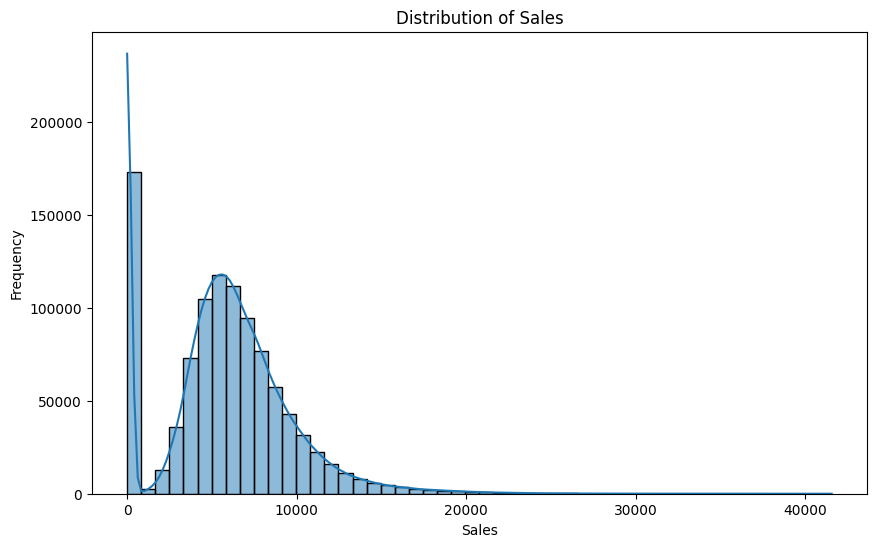

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [68]:
# Handling Outliers & Outlier treatments
from sklearn.ensemble import IsolationForest

# Select relevant features for outlier detection
features = ['DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'Sales']

# Subset the data with the selected features
subset_data = rossman_df[features].copy()

# Visualize the distribution of the 'Sales' feature
plt.figure(figsize=(10, 6))
sns.histplot(subset_data['Sales'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Fit Isolation Forest model
clf = IsolationForest(contamination=0.05, random_state=42)
outliers = clf.fit_predict(subset_data)

# Add outlier labels to the DataFrame
subset_data['Outlier'] = outliers


Detected Outliers:
         DayOfWeek  Open  Promo  SchoolHoliday  Sales  Outlier
3                5     1      1              1  13995       -1
6                5     1      1              1  15344       -1
23               5     1      1              1  14190       -1
24               5     1      1              1  14180       -1
26               5     1      1              1  13213       -1
...            ...   ...    ...            ...    ...      ...
1017204          2     0      0              1      0       -1
1017205          2     0      0              1      0       -1
1017206          2     0      0              1      0       -1
1017207          2     0      0              1      0       -1
1017208          2     0      0              1      0       -1

[50860 rows x 6 columns]


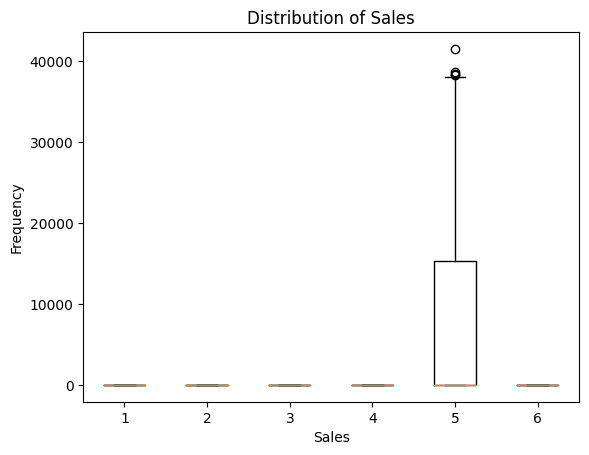

In [69]:
# Display the detected outliers
detected_outliers = subset_data[subset_data['Outlier'] == -1]
print("Detected Outliers:")
print(detected_outliers)
plt.boxplot(detected_outliers)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used Isolation Forest algorithm to detect outliers.It is an effective machine learning algorithm used for outlier detection. It works by isolating outliers in a dataset by constructing binary trees and identifying observations that are isolated (have shorter average path lengths in the trees).

In [70]:
# Encode your categorical columns
rossman_new_dummies = pd.get_dummies(rossman_new, drop_first=True)

In [71]:
rossman_new_dummies.head()

,Sales,Open,Promo,SchoolHoliday,StoreType,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,...,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,5263,1,1,1,3,1270.0,9.0,2008.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,5020,1,1,1,3,1270.0,9.0,2008.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,4782,1,1,1,3,1270.0,9.0,2008.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,5011,1,1,1,3,1270.0,9.0,2008.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,6102,1,1,1,3,1270.0,9.0,2008.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [72]:
rossman_new_dummies.shape

(1017209, 35)

In [73]:
rossman_new_dummies['Sales'].mean()

5773.818972305593

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

<ipython-input-74-495ef6248f91>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = rossman_new.corr()


<Axes: >

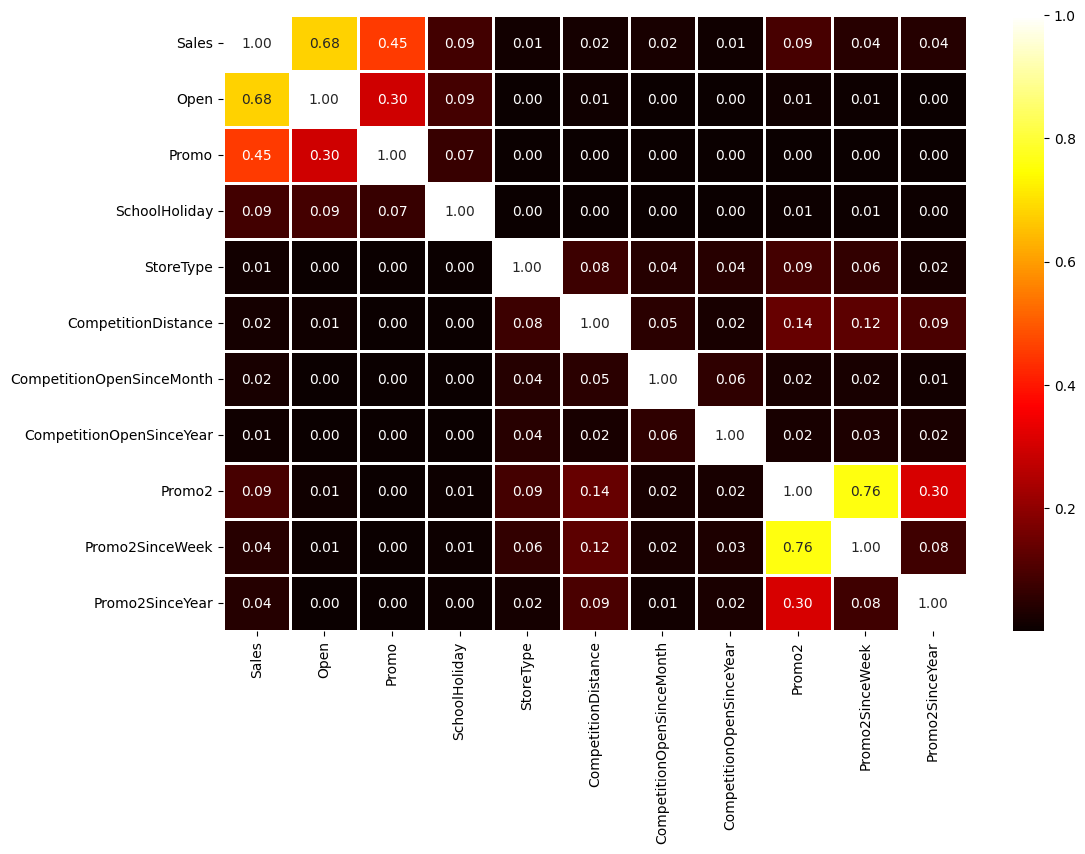

In [74]:
# Manipulate Features to minimize feature correlation and create new features
plt.figure(figsize =(12,8))
correlation = rossman_new.corr()
sns.heatmap(abs(correlation), annot = True,cmap ='hot', linewidth= 2, fmt ='.2f')

#### 2. Feature Selection

### Multicollinearity

**Multicollinearity is a statistical term that refers to the situation where two or more prediction variables in a Regression model are highly correlated with each other.**

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [76]:
def calc_vif(X):
  vif_df = pd.DataFrame()
  vif_df['variables'] = X.columns
  vif_df['VIF'] = [vif(X.values, i) for i in range(X.shape[1])]
  return vif_df

In [77]:
calc_vif(rossman_new[[i for i in rossman_new.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Open,6.479519
1,Promo,1.774498
2,SchoolHoliday,1.229105
3,StoreType,3.689407
4,CompetitionDistance,1.541464
5,CompetitionOpenSinceMonth,8.922044
6,CompetitionOpenSinceYear,135275.282946
7,Promo2,4.816362
8,Promo2SinceWeek,3.733450
9,Promo2SinceYear,135166.881968


**From the above table, we can see that VIF value for columns CompetitionOpenSinceYear and Promo2SinceYear is very high, so we can drop either of these columns. Here we will drop CompetitionOpenSinceYear.**

In [78]:
calc_vif(rossman_new[[i for i in rossman_new.describe().columns if i not in ['Sales','CompetitionOpenSinceYear']]])

,variables,VIF
0,Open,6.479489
1,Promo,1.774498
2,SchoolHoliday,1.229098
3,StoreType,3.679843
4,CompetitionDistance,1.540321
5,CompetitionOpenSinceMonth,8.895176
6,Promo2,4.778673
7,Promo2SinceWeek,3.728011
8,Promo2SinceYear,17.499779


In [79]:
calc_vif(rossman_new[[i for i in rossman_new.describe().columns if i not in ['Sales','CompetitionOpenSinceYear','Promo2SinceYear']]])

,variables,VIF
0,Open,4.926505
1,Promo,1.772844
2,SchoolHoliday,1.223581
3,StoreType,3.297224
4,CompetitionDistance,1.478522
5,CompetitionOpenSinceMonth,5.024026
6,Promo2,4.679484
7,Promo2SinceWeek,3.727861


**VIF Factor <= 5 is considered good to trail ML models.**


### 3. Categorical Encoding

In [80]:
# Select your features wisely to avoid overfitting
dependent_variable = 'Sales'
independent_variables = rossman_new_dummies.columns.drop(dependent_variable)

print(list(independent_variables))

X = rossman_new_dummies[independent_variables]
y = rossman_new_dummies[dependent_variable]

['Open', 'Promo', 'SchoolHoliday', 'StoreType', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'DayOfWeek_Mon', 'DayOfWeek_Sat', 'DayOfWeek_Sun', 'DayOfWeek_Thurs', 'DayOfWeek_Tues', 'DayOfWeek_Wed', 'StateHoliday_Easter', 'StateHoliday_None', 'StateHoliday_Public Holiday', 'Assortment_(b)extra', 'Assortment_(c)extended', 'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep']


In [81]:
X.head()

,Open,Promo,SchoolHoliday,StoreType,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,...,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,1,1,1,3,1270.0,9.0,2008.0,0,0.0,2011.0,...,0,0,0,1,0,0,0,0,0,0
1,1,1,1,3,1270.0,9.0,2008.0,0,0.0,2011.0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,1,3,1270.0,9.0,2008.0,0,0.0,2011.0,...,0,0,0,1,0,0,0,0,0,0
3,1,1,1,3,1270.0,9.0,2008.0,0,0.0,2011.0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,1,3,1270.0,9.0,2008.0,0,0.0,2011.0,...,0,0,0,1,0,0,0,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

**I have used One Hot Encoding method to get dummies for Categorical variables like StoreType, Assortments etc. get_dummies is a method provided by the pandas library in Python, which is commonly used for converting categorical variables into a set of binary dummy/indicator variables. This process is known as one-hot encoding.**

### 5. Data Splitting

In [82]:
# Split your data to train and test. Choose Splitting ratio wisely.

X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size = 0.2, random_state = 0)

In [83]:
X_train.shape

(813767, 34)

In [84]:
X_test.shape

(203442, 34)

In [85]:
y_train.shape

(813767,)

In [86]:
y_test.shape

(203442,)

In [87]:
X_train_cols = X_train.columns
X_test_cols = X_test.columns

### 6. Data Scaling

In [88]:
# Scaling your data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## ***7. ML Model Implementation***

### ML Model - 1
## Linear Regression

In [89]:
# ML Model - 1 Implementation

reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

print('R^2: ', r2_score(y_test,y_pred))

MSE = mean_squared_error(y_test,y_pred)
print('MSE:',MSE)

RMSE = math.sqrt(MSE)
print('RMSE: ',RMSE)

RMPSE = (RMSE/rossman_new['Sales'].mean())*100
print('RMPSE:', RMPSE)


R^2:  0.5679222003164068
MSE: 6369423.892895313
RMSE:  2523.771759271292
RMPSE: 43.71061461013391


In [90]:
reg.intercept_

5774.333212086507

In [91]:
reg.coef_

array([2826.29915247, 1084.41277598,   86.25408282,  -74.25200101,
       -187.36852863,  -93.39610014,   18.8844942 , -439.43576368,
        249.54120589,  -37.79595166,  383.60687959,   18.37559518,
        598.78063808, -110.46256322,    8.06595735, -120.7752489 ,
       -149.80183524, -298.29600735, -124.5656746 ,  354.58188313,
        160.47599034,  105.26594556,  -69.45344518,   22.93344567,
         49.39999519,  -81.31036165,   13.00258168,  -76.07988306,
        -45.68112464,    9.90442776,  -56.3157355 ,   21.60525796,
        -21.97294349,  100.47160552])

##Ridge Regression

In [92]:
#Ridge
ridge_model=Ridge(alpha=1)
ridge_model.fit(X_train, y_train)
y_pred=ridge_model.predict(X_test)

print('R^2: ', r2_score(y_test,y_pred))

MSE = mean_squared_error(y_test,y_pred)
print('MSE:',MSE)

RMSE = math.sqrt(MSE)
print('RMSE: ',RMSE)

RMPSE = (RMSE/rossman_new['Sales'].mean())*100
print('RMPSE:', RMPSE)

R^2:  0.5679222008790906
MSE: 6369423.884600576
RMSE:  2523.7717576279706
RMPSE: 43.71061458167231


### Cross Validation and Hyperparameter Training

In [93]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='r2')

In [94]:
# Perform cross-validation predictions
cv_predictions = cross_val_predict(ridge, X, y, cv=5) # 'cv' is the number of folds in cross-validation
cv_predictions

array([ 8057.01255162,  7733.20893178,  7695.52019311, ...,
        5278.39851048,  5247.34964245, -1107.7590081 ])

In [96]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the best r2 score is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the best r2 score is:  0.5684617282967287


In [97]:
parameters2 = {'alpha': [4.99,5,5.1,5.2,4.98]}
ridge_regressor1 = GridSearchCV(ridge, parameters2, scoring='r2', cv=3)
ridge_regressor1.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [4.99, 5, 5.1, 5.2, 4.98]}, scoring='r2')

In [98]:
print("The best fit alpha value is found out to be :" ,ridge_regressor1.best_params_)
print("\nUsing ",ridge_regressor1.best_params_, " the best r2 score is: ", ridge_regressor1.best_score_)

The best fit alpha value is found out to be : {'alpha': 4.98}

Using  {'alpha': 4.98}  the best r2 score is:  0.5684617282970331


In [99]:
#Model Prediction
y_pred_ridge = ridge_regressor1.predict(X_test)

<ipython-input-100-e85fc43b6560>:2: RuntimeWarning: overflow encountered in power
  plt.plot(10**(y_pred_ridge))


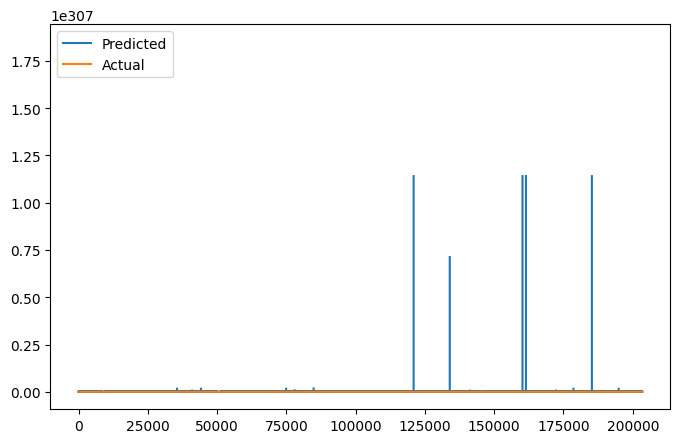

In [100]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##Lasso Regression

In [101]:
#Lasso
lasso_model=Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
y_pred=lasso_model.predict(X_test)

print('R^2: ', r2_score(y_test,y_pred))

MSE = mean_squared_error(y_test,y_pred)
print('MSE:',MSE)

RMSE = math.sqrt(MSE)
print('RMSE: ',RMSE)

RMPSE = (RMSE/rossman_new['Sales'].mean())*100
print('RMPSE:', RMPSE)

R^2:  0.5679222763613891
MSE: 6369422.77188718
RMSE:  2523.7715371814425
RMPSE: 43.71061076363559


### Cross- Validation & Hyperparameter Tuning

In [102]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
#lasso_regressor.fit(X_train, y_train)

In [103]:
#print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
#print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

In [104]:
#y_pred_lasso = lasso_regressor.predict(X_test)

In [105]:
#plt.figure(figsize=(8,5))
#plt.plot(10**(y_pred_lasso))
#plt.plot(10**(np.array(y_test)))
#plt.legend(["Predicted","Actual"])
#plt.show()

### ML Model - 2
## Decision Tree

In [106]:
# ML Model - 2 Implementation

dt_regressor=DecisionTreeRegressor(max_depth=5)
dt_regressor.fit(X_train, y_train)
y_pred=dt_regressor.predict(X_test)
y_train_pred=dt_regressor.predict(X_train)

print('R^2: ', r2_score(y_test,y_pred))

MSE = mean_squared_error(y_test,y_pred)
print('MSE:',MSE)

RMSE = math.sqrt(MSE)
print('RMSE: ',RMSE)

RMPSE = (RMSE/rossman_new['Sales'].mean())*100
print('RMPSE:', RMPSE)

R^2:  0.5766434720900502
MSE: 6240860.294274517
RMSE:  2498.1713900920645
RMPSE: 43.267227498379604


In [107]:
X_test_cols

Index(['Open', 'Promo', 'SchoolHoliday', 'StoreType', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'DayOfWeek_Mon', 'DayOfWeek_Sat',
       'DayOfWeek_Sun', 'DayOfWeek_Thurs', 'DayOfWeek_Tues', 'DayOfWeek_Wed',
       'StateHoliday_Easter', 'StateHoliday_None',
       'StateHoliday_Public Holiday', 'Assortment_(b)extra',
       'Assortment_(c)extended', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'Month_Aug', 'Month_Dec', 'Month_Feb',
       'Month_Jan', 'Month_Jul', 'Month_Jun', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep'],
      dtype='object')

In [108]:
dt_regressor.feature_importances_

array([0.7965685 , 0.12676067, 0.        , 0.        , 0.02029186,
       0.        , 0.        , 0.00846546, 0.00734725, 0.00491757,
       0.02692295, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00872574,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [109]:
feature_importance = pd.DataFrame(dt_regressor.feature_importances_.reshape(1, -1),columns = X_test_cols, index = ['feature_importance'])
feature_importance.T

,feature_importance
Open,0.796569
Promo,0.126761
SchoolHoliday,0.000000
StoreType,0.000000
CompetitionDistance,0.020292
CompetitionOpenSinceMonth,0.000000
CompetitionOpenSinceYear,0.000000
Promo2,0.008465
Promo2SinceWeek,0.007347
Promo2SinceYear,0.004918


<Axes: >

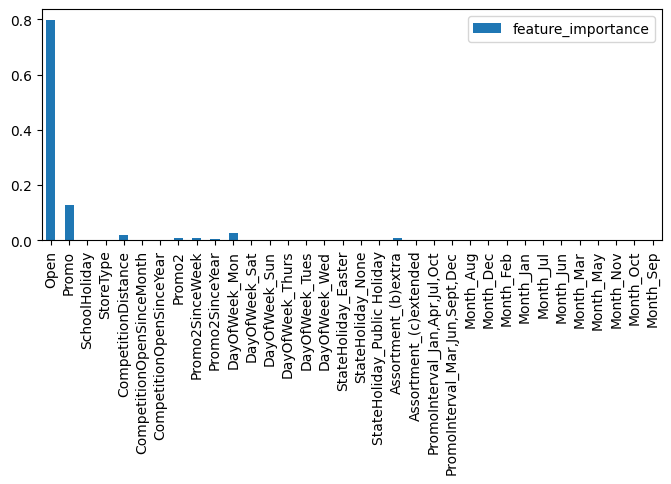

In [110]:
feature_importance.T.plot.bar(figsize=(8,3))

#### 2. Cross- Validation & Hyperparameter Tuning

In [111]:
from sklearn.model_selection import cross_val_score
num_folds = 5
scores = cross_val_score(dt_regressor, X, y, cv=num_folds)

In [112]:
print("Cross Validation Score : ", scores)
mean_score = scores.mean()
print("Mean Cross Validation Score : ", mean_score)

Cross Validation Score :  [0.59437491 0.53016401 0.51944779 0.5261352  0.59864595]
Mean Cross Validation Score :  0.5537535710998374


In [113]:
# Printing  the cross-validation scores
for fold, score in enumerate(scores, start=1):
    print(f"Fold {fold}: {score:.4f}")

print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

Fold 1: 0.5944
Fold 2: 0.5302
Fold 3: 0.5194
Fold 4: 0.5261
Fold 5: 0.5986
Mean Accuracy: 0.5538
Standard Deviation: 0.0351


In [114]:
# Perform cross-validation predictions
cv_predictions = cross_val_predict(dt_regressor, X, y, cv=5) # 'cv' is the number of folds in cross-validation
cv_predictions

array([8156.0728974 , 8156.0728974 , 8156.0728974 , ..., 5637.82466908,
       5637.82466908,    0.        ])

In [116]:
param_grid = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV instance
grid_search = GridSearchCV(dt_regressor, param_grid, cv=5)

# Fit the model to find the best parameters
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

KeyboardInterrupt: ignored

### ML Model - 3
## Random Forest Regressor

In [117]:
# ML Model - 3 Implementation

rf_regressor=RandomForestRegressor(n_estimators =50,max_depth=2)
rf_regressor.fit(X_train, y_train)
y_pred=rf_regressor.predict(X_test)
print('R^2: ', r2_score(y_test,y_pred))

MSE = mean_squared_error(y_test,y_pred)
print('MSE:',MSE)

RMSE = math.sqrt(MSE)
print('RMSE: ',RMSE)

RMPSE = (RMSE/rossman_new['Sales'].mean())*100
print('RMPSE:', RMPSE)


R^2:  0.5337877127523001
MSE: 6872613.412981214
RMSE:  2621.566976634626
RMPSE: 45.40438467518813


Text(0.5, 1.0, 'Feature Importance')

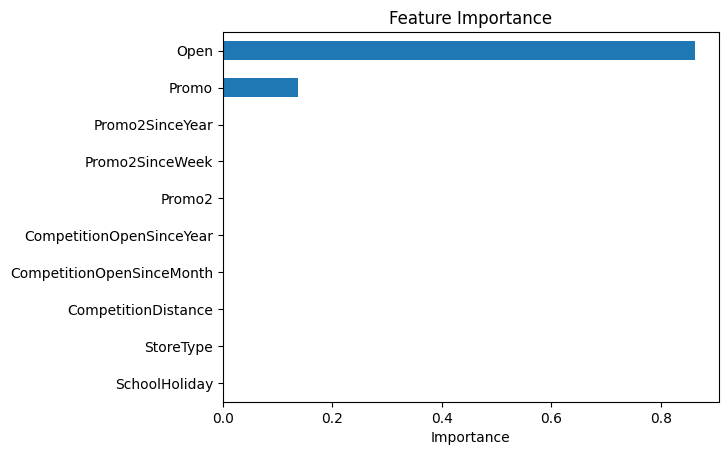

In [118]:
feature_importances = pd.Series(rf_regressor.feature_importances_, index=X_train_cols)
feature_importances.nlargest(10).sort_values(ascending = True).plot(kind='barh')
plt.xlabel('Importance')
plt.title('Feature Importance')

#### 2. Cross- Validation & Hyperparameter Tuning

In [121]:
# Perform cross-validation with 5 folds
cross_val_scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='r2')

r2_score_value = cross_val_scores

# Print the cross-validation scores
print("Cross-validation R2 score:", r2_score_value)
print("Mean CV Score:", np.mean(r2_score_value))

# Perform cross-validation predictions
cv_predictions = cross_val_predict(rf_regressor, X, y, cv=5)
 # 'cv' is the number of folds in cross-validation

Cross-validation R2 score: [0.61344674 0.49932885 0.50573952 0.49890117 0.5692864 ]
Mean CV Score: 0.5373405366028438


In [122]:
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter distribution to sample from
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create RandomizedSearchCV instance
random_search = RandomizedSearchCV(rf_regressor, param_distributions=param_dist, n_iter=10, cv=5)

# Fit the model to find the best parameters
random_search.fit(X_train, y_train)

# Get the best regressor from the search
best_regressor = random_search.best_estimator_

# Apply cross_val_predict using the best regressor
predicted_values = cross_val_predict(best_regressor, X_test, y_test, cv=5)

# Print the predicted values
print("Predicted Values:", predicted_values)

KeyboardInterrupt: ignored

# **Evaluation Metric Chart**

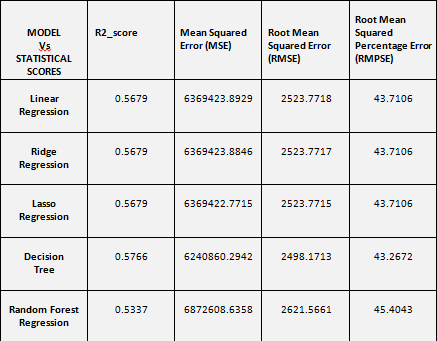

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I have used R2 score metric for analysing business impact.The R2 score measures the proportion of the variance in the dependent variable (predicted values) that is explained by the independent variables (features) in a regression model. It indicates the goodness of fit of the model to the actual data.A high R2 score suggests that the model's predictions closely align with the actual outcomes. This is particularly useful because my project involves predicting business-related outcomes,which is sales. A strong R2 score indicates that the project is successful in capturing the underlying relationships in the data, leading to accurate predictions.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have chosen the Random Forest Regressor Model here as it is giving the best value for our Evaluation metric. Apart from this, Random Forest Model has the following characteristics and advantages:

* **Accuracy**: Random Forest is known for its high accuracy. It combines the predictions of multiple decision trees, reducing the risk of overfitting that can occur with individual trees. This ensemble approach often results in more robust and accurate predictions.

* **Robustness**: Random Forest is less sensitive to outliers and noise in the data compared to some other models. It averages out the predictions of multiple trees, reducing the impact of individual noisy data points.

* **Feature Importance**: Random Forest provides a built-in mechanism to assess the importance of features in making predictions. This can be crucial for business decision-making, as it helps identify which factors have the most influence on the outcomes, aiding in understanding the underlying drivers of the predictions.

* **Reduced Overfitting**: While individual decision trees can easily overfit the data, the ensemble nature of Random Forest helps mitigate this issue. The averaging of multiple trees' predictions tends to produce a more balanced and generalized model.

* **Less Prone to Bias**: Unlike some other models that can be biased towards certain classes or outcomes, Random Forest tends to be less biased due to its randomness in feature selection and data sampling.









### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**LIME** (Local Interpretable Model-agnostic Explanations) is a model explainability tool that helps you understand the predictions of complex machine learning models by providing interpretable explanations at the local level. LIME is designed to explain individual predictions rather than the entire model's behavior. It approximates the behavior of the model around a specific instance by fitting a simpler, interpretable model to perturbed versions of that instance.

In [124]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=d4b1aa40b05807bb5802c2eacd0147813aab44bd4173fbf48958b16cf291bb2d
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [125]:
import lime
import lime.lime_tabular

In [134]:
#Select a specific instance from the test set that you want to explain.
instance_idx = 0  # Choose an index from X_test

X_test_new = pd.DataFrame(X_test)
X_train_new = pd.DataFrame(X_train)

selected_instance = X_test_new.iloc[instance_idx]

#Create a LIME explainer object for tabular data.
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_new.values, mode="regression")

In [135]:
# Use the explainer to explain the prediction for the selected instance using the Random Forest model.

explanation = explainer.explain_instance(selected_instance.values, rf_regressor.predict)

In [136]:
# Visualize the explanation using the LIME visualization tools.

explanation.show_in_notebook()

# **Conclusion**

In this analysis of the Rossmann Retail Sales dataset, we gained valuable insights into the sales patterns, customer behavior, and promotional strategies of the retail chain. By employing a combination of exploratory data analysis (EDA) techniques, time series analysis, and predictive modeling, we were able to extract meaningful information to inform decision-making and strategy formulation.

1. **Key Findings and Insights:**

* Sales Trends and Seasonality: Our analysis revealed a consistent upward trend in sales over the analyzed time period, indicating the company's overall growth. Seasonal patterns were evident, with higher sales observed during certain months and holidays, suggesting the importance of tailoring strategies to capitalize on these periods.

* Promotional Impact:

* Store Analysis: Different store types and sizes exhibited varying sales patterns and customer behaviors. "Store Type B" consistently demonstrated stronger sales performance, while "Store Type D" showed potential for improvement.

* Day of the Week and Holidays: Weekdays and weekends demonstrated distinct sales patterns, with weekends experiencing higher sales. Holidays and special events also influenced sales trends, indicating the need for tailored operational planning during these periods.

* Customer Behavior: Customer count correlated strongly with sales, underscoring the importance of foot traffic in driving revenue. Promotions and holidays influenced customer behavior, leading to fluctuations in customer count.

* Predictive Modeling: We chose the Random Forest Regression forecasting model to predict future sales, providing a foundation for more advanced forecasting techniques. This model exhibited reasonable predictive accuracy and can serve as a starting point for further improvements.

2. **Recommendations:**

* Optimized Promotions: Based on our analysis, optimizing the timing, duration, and type of promotions could yield substantial sales boosts. Experimentation with different promotion strategies, such as personalized offers or location-specific discounts, could enhance effectiveness.

* Customer Segmentation: Implementing customer segmentation strategies can enable targeted marketing efforts and personalized shopping experiences. Tailoring promotions and product offerings to distinct customer groups can lead to increased customer loyalty and satisfaction.

* Store Strategy: A closer examination of "Store Type D" is recommended to identify opportunities for improvement in sales performance. Analyzing factors such as location, assortment, and marketing initiatives could lead to actionable insights.

* Advanced Forecasting Models: We can onsider implementing advanced time series forecasting techniques, such as ARIMA or other machine learning-based models, to enhance predictive accuracy and capture more complex sales patterns.

* Operational Planning: Utilize the identified seasonality and holiday effects to optimize staffing, inventory management, and operational logistics to align with peak sales periods.

In conclusion, our analysis of the Rossmann Retail Sales dataset provided valuable insights that can inform strategic decision-making across various aspects of the retail business. By leveraging these findings and recommendations, Rossmann can optimize promotions, tailor marketing efforts, and enhance overall operational efficiency, leading to increased sales and customer satisfaction.









### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***